In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics as sts

In [2]:
dataset = pd.read_csv('Churn.csv', sep=";")  # lendo uma base de dados 

In [3]:
dataset.head(10) # analisando as primeiras 10 linhas 

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


In [18]:
dataset.isnull()  # verificando dados nulos 
dataset.dropna()  #retirar dados - colunas - com NaN
dataset.shape

(999, 12)

In [5]:
# dando nomes as colunas 
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
agrupado  = dataset.groupby(['Estado']).size() # explorando os dados da categoria Estado
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

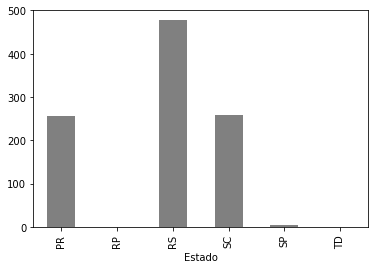

In [7]:
agrupado.plot.bar(color = 'gray')

<AxesSubplot:xlabel='Genero'>

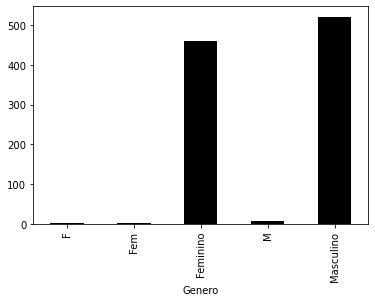

In [8]:
agrupado1  = dataset.groupby(['Genero']).size() # explorando os dados da categoria Estado
agrupado1.plot.bar(color = 'black')

In [9]:
# explorando as colunas numéricas
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

C:\Users\Rodolfo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

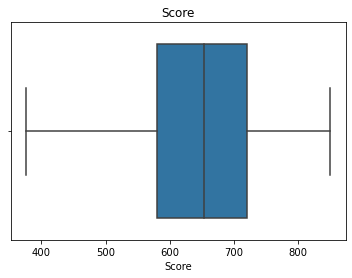

In [10]:
sns.boxplot(dataset['Score']).set_title('Score')

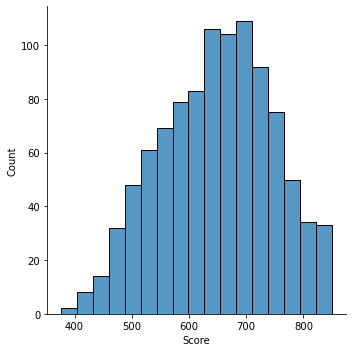

In [11]:
sns.displot(dataset['Score'])

In [12]:
dataset['Idade'].describe()  # verificando as informações do dataset 'IDADE'

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

C:\Users\Rodolfo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

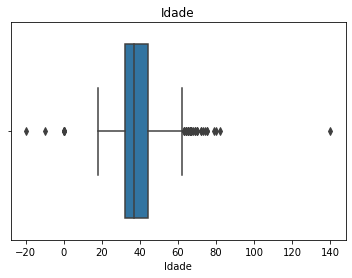

In [13]:
sns.boxplot(dataset['Idade']).set_title('Idade')  # verificando informações dispersas
# aqui verificamos idades abaixo de zero e acima de 100, por isso precisamos tratar esses dados e retirar esses valores


AttributeError: 'FacetGrid' object has no attribute 'set_title'

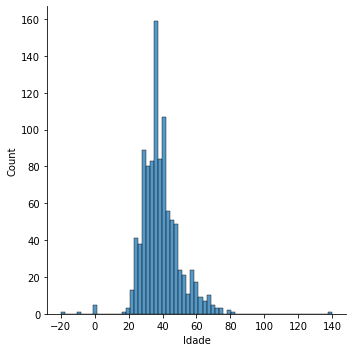

In [14]:
sns.displot(dataset['Idade']).set_title('Idade') # verificando com boxplot 

In [ ]:
 # Identificando onde estão os valores NaN
dataset.isnull().sum()    

In [19]:
 # resolvendo as idades fora do domínio 
dataset['Idade'].describe()   # Vizualisando

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [21]:
dataset.loc[(dataset['Idade'] < 0 )   |(dataset["Idade"] > 120) ]  # aqui estamos localizando os problemas das idades
# então printamos e verificamos onde temos as idades menores que zero e maiores que 120 para solicionarmos
mediana =sts.median(dataset['Idade'])  # calculamos a mediana para substituirmos como critério
mediana
#substituindo pela mediana das idades os valores 'outliers'
dataset.loc[(dataset['Idade'] < 0 )   |(dataset["Idade"] > 120),'Idade' ] = mediana 

# quando atender este filtro, a coluna idade vai receber a mediana 

dataset.loc[(dataset['Idade'] < 0 )   |(dataset["Idade"] > 120) ]
dataset['Idade'].describe()   # Vizualisando

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [22]:
# FAZENDO O TRATAMENTO PARA A BASE DE DADOS 'SALÁRIO'
# remover Nan e substitur pela mediana
dataset['Salario'].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [39]:
mediana = sts.median(dataset['Salario'])
#mediana
# # outliers em salário, vamos considerar 2 desvios padrão
desv  = sts.stdev(dataset['Salario'])  # tinham salários muito acima da média 
#dataset.loc[dataset['Salario'] >= 2 *desv ]   # vizualisando se tem salários 2* maiores que o desvio padrão
#dataset.head()

nan

In [40]:
agrupado = dataset.groupby(['Genero']).size()  # padronizando os NAs
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [41]:
dataset['Genero'].isnull().sum()  # contando o numero de Nas   

8

In [42]:
dataset['Genero'].fillna('Masculino',inplace=True)  #  Preenchendo as colunas dos Nas
dataset['Genero'].isnull().sum()  # contando o numero de Nas novamente, agora temos zero.   

0

In [43]:
#padronizando de acordo com o domínio
dataset.loc[dataset['Genero'] =='M','Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = "Feminino"

#Vizualisando 
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [44]:
# resolvendo um problema de dados dubplicados 
dataset[dataset.duplicated(['Id'], keep = False)]  # verificando os dados duplicados da tabela Id

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [45]:
# Após verificar 2 dados duplicados, iremos remove-los  
dataset.drop_duplicates(subset='Id',keep = 'first',inplace=True) # keep manter o primeiro e excluir o segunto 
# inplace é subst no próprio conjunto de dados 

dataset[dataset.duplicated(['Id'], keep = False)]  # verificando que não temos mais 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [46]:
# estado fora do domínio
agrupado  = dataset.groupby(['Estado']).size() # explorando os dados da categoria Estado
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [47]:
# Observamos que temos alguns dados errados 'RP,SP E TD'
# Colocando todos para RS
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS" #  coluna estado e atribua RS
dataset.groupby(['Estado']).size() # explorando os dados da categoria Estado
# logo, os dados de RS terão mais informações. 
# verificando: 

Estado
PR    257
RS    483
SC    258
dtype: int64

In [54]:
#dataset.isnull()
dataset.shape

(998, 12)

In [55]:
dataset.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.00000,9.910000e+02,998.000000
mean,501.337675,648.605210,38.908818,5.073146,7.162423e+06,1.526052,0.703407,0.51002,3.530593e+07,0.203407
std,288.500953,98.312117,10.676642,2.926320,6.314508e+06,0.574293,0.456985,0.50015,5.308476e+08,0.402734
min,1.000000,376.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,252.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.020010e+06,0.000000
50%,501.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,1.000000,1.00000,8.695742e+06,0.000000
75%,750.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.000000,1.00000,1.404604e+07,0.000000
max,1000.000000,850.000000,82.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000
